In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import time
np.set_printoptions(threshold=np.inf)  #使输出数据完整显示

src_dir='/home/zhaobenyan/repos/patchV1/src/'
patchfast='/home/zhaobenyan/dataset/patchfast/'

In [3]:
#将minimal.cfg中的替死鬼文件中的数据换成实验输入的，dir:grating所在地址 
def replace(dir):
    with open(dir) as f:
        x_1 = np.fromfile(f, 'i4', 1)
        x_2 = np.fromfile(f, 'i4', 3)
        nFrame=x_2[0]
        size=x_2[1]
        x_3 = np.fromfile(f, 'f4', 3)
        x_4 = np.fromfile(f, 'f4', 2)
        x_5 = np.fromfile(f, 'u4', 1)
        x_6 = np.fromfile(f, 'f4', nFrame*size*size*3)
        #写文件,'wb'表示覆盖写文件 f1打开“替死鬼”文件地址
        f1 = open('/home/zhaobenyan/dataset/resource/static_color-grid_0.bin', 'wb') 
        np.array(x_1).astype('i4').tofile(f1) 
        np.array((x_2[0],size,size), dtype='i4').tofile(f1)
        x_3.astype('f4').tofile(f1) # init_luminance
        np.array(x_4, dtype='f4').tofile(f1)
        np.array(x_5).astype('u4').tofile(f1)
        np.array(x_6).astype('f4').tofile(f1)
        f1.close() #记得要关文件

In [4]:
#运行minimalTC
def minimalTC():
   os.system(f'cd {src_dir} && ./minimalTC')

In [5]:
#读取fr
def read_spike(file):
    with open(file) as f:
        sampleSize = np.fromfile(f, 'u4', 1)[0] #一共5120
        sample_t0, sample_t1 = np.fromfile(f, 'f4', 2)#t0是开始时间，t1是结束时间，我一共跑了1s
        nt = np.fromfile(f, 'u4', 1)[0]
        nLGN = np.fromfile(f, 'u4', 1)[0]
        LGN_spike_time = np.fromfile(f, 'u4', nLGN*nt)
        sampleID = np.fromfile(f, 'u4', sampleSize)#id排序是顺序的
        sample_spikeCount = np.fromfile(f, 'u4', sampleSize)
        fr = sample_spikeCount/(sample_t1-sample_t0)*1000
    LGN_spike_time = LGN_spike_time.reshape((nt,nLGN)).T
    return sampleID,fr


In [6]:
#实验测试 file:输入图片
def experiment(file):
    replace(file)
    minimalTC()

In [7]:

file='/home/zhaobenyan/dataset/grating/grating_16x16_frameRate1/static_color-grid_10.bin'
experiment(file)

repeat_test
overwrite contents in /home/zhaobenyan/dataset/repeat_test
configuration files copied
one_ori=1
plotting files copied


(array([1602.,  510.,  294.,  189.,  159.,  142.,  109.,   83.,   74.,
          77.,   52.,   75.,   44.,   48.,   44.,   39.,   35.,   40.,
          23.,   18.,   15.,   20.,   10.,   10.,   14.,   10.,   14.,
           7.,    5.,    8.,    3.,    3.,    2.,    4.,    3.,    3.,
           5.,    3.,    5.,    3.,    2.,    2.,    3.,    0.,    4.,
           2.,    2.,    2.,    0.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <BarContainer object of 49 artists>)

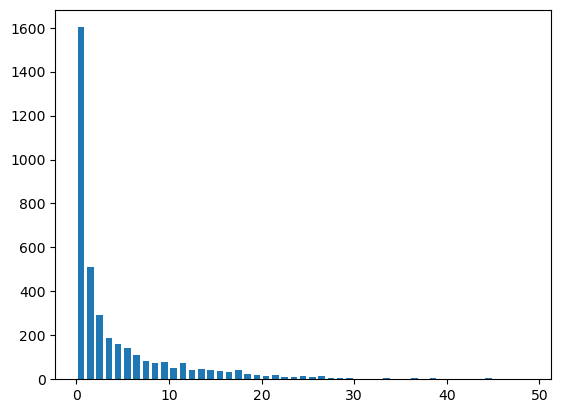

In [8]:
_,fr=read_spike('/home/zhaobenyan/dataset/patchfast/sample_spikeCount_test_1.bin')
plt.hist(fr,bins=np.arange(0,50,1),rwidth=0.7)